In [1]:
from pyimagesearch.nn.conv.lenet import LeNet

from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import cv2

Using TensorFlow backend.
/home/autom8-sudesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/autom8-sudesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/autom8-sudesh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/autom8-sudesh/.local/lib/python3.6/sit

In [2]:
print("[INFO] accessing MNIST...")

mnist = loadmat("/home/autom8-sudesh/Desktop/mnist-original.mat")
x = mnist['data'].T
y = mnist['label'][0]



[INFO] accessing MNIST...


In [3]:
(trainX,testX,trainY,testY) = train_test_split(x/255.0,y.astype("int"),test_size=0.25,random_state=42)


In [4]:

if K.image_data_format() == 'channels_first':
  trainX = trainX.reshape(trainX.shape[0], 1, 28,28)
  testX = testX.reshape(trainX.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  trainX = trainX.reshape(trainX.shape[0],28, 28, 1)
  testX = testX.reshape(testX.shape[0],28, 28, 1)
  input_shape = (28, 28, 1)

    
trainX = trainX.astype('float32')
testX = testX.astype('float32')    


le = LabelBinarizer()
trainY=le.fit_transform(trainY)
testY = le.fit_transform(testY)


In [5]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, fill_mode="nearest")

In [6]:
print("[INFO] compiling model....")

opt = SGD(lr=0.01)
model=LeNet.build(width=28,height=28,depth=1,classes=10)
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

[INFO] compiling model....
Instructions for updating:
Colocations handled automatically by placer.


In [7]:
print("[INFO] training network...")

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=32),
validation_data=(testX, testY), steps_per_epoch=len(trainX) // 32,
epochs=50, verbose=1)


[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1640/1640 [==============================] - 142s 87ms/step - loss: 0.9453 - accuracy: 0.6973 - val_loss: 0.1569 - val_accuracy: 0.9567
Epoch 2/50
1640/1640 [==============================] - 141s 86ms/step - loss: 0.2855 - accuracy: 0.9125 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 3/50
1640/1640 [==============================] - 141s 86ms/step - loss: 0.2055 - accuracy: 0.9368 - val_loss: 0.0801 - val_accuracy: 0.9749
Epoch 4/50
1640/1640 [==============================] - 140s 85ms/step - loss: 0.1678 - accuracy: 0.9489 - val_loss: 0.0723 - val_accuracy: 0.9790
Epoch 5/50
1640/1640 [==============================] - 141s 86ms/step - loss: 0.1408 - accuracy: 0.9561 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 6/50
1640/1640 [==============================] - 141s 86ms/step - loss: 0.1263 - accuracy: 0.9622 - val_loss: 0.0529 - val_accuracy: 0.9838
Epoch 7/50
1640/1640 [=====================

In [8]:

print("[INFO] evaluating network...")
predictions = model.predict(testX,batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),
                            target_names=[str(x) for x in le.classes_]))


[INFO] evaluating network...
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      1677
          1       1.00      0.99      1.00      1935
          2       0.99      1.00      0.99      1767
          3       0.99      0.99      0.99      1766
          4       0.98      1.00      0.99      1691
          5       0.99      0.99      0.99      1653
          6       0.99      0.99      0.99      1754
          7       0.99      0.99      0.99      1846
          8       0.99      0.99      0.99      1702
          9       0.99      0.99      0.99      1709

avg / total       0.99      0.99      0.99     17500



In [9]:
model.save("MNISTMODEL2.hdf5")

ValueError: x and y must have same first dimension, but have shapes (20,) and (50,)

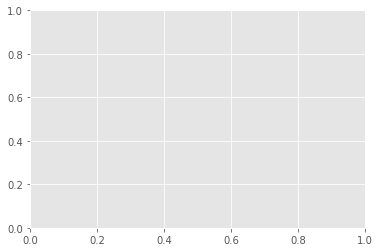

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()